# Amazon books analysis using Python

Goodreads is a book-centric review website that launched in January 2007 and was acquired by Amazon in 2013.Goodreads is the world’s largest site for readers and book recommendations. It is a book-focused website that helps you keep track of what you're reading and lets you write book reviews.

Dataset on Amazon's Top 50 bestselling books from 2009 to 2019. Contains 550 books, data has been categorized into fiction and non-fiction using Goodreads

The dataset used in this analysis is downloaded from  kaggle.com

In this work, exploratory data analysis has been carried out dataset Amazon's Top 50 bestselling books from 2009 to 2019.

FEATURES:

Name - Name of the Book

Author - The author of the Book

User Rating - Amazon User Rating

Reviews - Number of written reviews on amazon

Price - The price of the book (As at 13/10/2020)

Year - The Year(s) it ranked on the bestseller

Genre - Whether fiction or non-fiction


In [2]:
#importing necessory packages

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#Importing the dataset

books = pd.read_csv("Data\\bestsellers with categories.csv")
books.head()

,Name,Author,Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [4]:
#Extracting the column names from books dataframe

print(books.columns.values)

['Name' 'Author' 'Rating' 'Reviews' 'Price' 'Year' 'Genre']


In [5]:
#Extracting additional info about the dataset

books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Name     550 non-null    object 
 1   Author   550 non-null    object 
 2   Rating   550 non-null    float64
 3   Reviews  550 non-null    int64  
 4   Price    550 non-null    int64  
 5   Year     550 non-null    int64  
 6   Genre    550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [6]:
#Checking Null values count in the dataset

books.isnull().sum()

Name       0
Author     0
Rating     0
Reviews    0
Price      0
Year       0
Genre      0
dtype: int64

There are no NULL values available in this dataset.

In [7]:
# Checking for negative error-entries in numeric columns

print(len(books.loc[books.Rating<0,:]))
print(len(books.loc[books.Reviews<0,:]))
print(len(books.loc[books.Price<0,:]))
print(len(books.loc[books.Price<0,:]))

0
0
0
0


There are no negative error entries in this dataset.

In [8]:
# Dropping all the duplicates in the columns

books.drop_duplicates(subset="Name",keep = 'first', inplace=True)

All the duplicate values from the dataset has been removed

In [9]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 351 entries, 0 to 546
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Name     351 non-null    object 
 1   Author   351 non-null    object 
 2   Rating   351 non-null    float64
 3   Reviews  351 non-null    int64  
 4   Price    351 non-null    int64  
 5   Year     351 non-null    int64  
 6   Genre    351 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 21.9+ KB


Previously there were 550 rows in the dataset, but after dropping the duplicates we have 351 rows

# Top 3 Author's by Rating

In [10]:
topAuthor = books.sort_values('Rating', ascending = False)
topAuthor.head(3)

,Name,Author,Rating,Reviews,Price,Year,Genre
151,Hamilton: The Revolution,Lin-Manuel Miranda,4.9,5867,54,2016,Non Fiction
289,Rush Revere and the First Patriots: Time-Trave...,Rush Limbaugh,4.9,3836,12,2014,Fiction
157,Harry Potter and the Sorcerer's Stone: The Ill...,J.K. Rowling,4.9,10052,22,2016,Fiction


[Text(0.5, 1.0, 'Top Authors by Rating')]

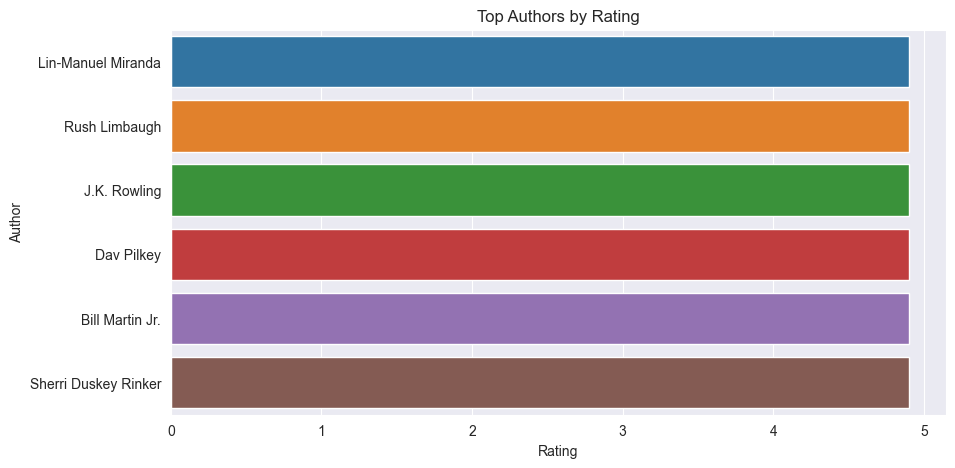

In [11]:
#Top Authors by rating

sns.set_style(style = "darkgrid")
plt.figure(figsize = (10,5))
author_df = books.sort_values("Rating", ascending = False).head(10)
sns.barplot(y = "Author", x = "Rating", data = author_df).set(title = "Top Authors by Rating")

As we can see, Lin-Manuel Miranda, Rush Limbaugh and J.K.Rowling has the highest rating.

# Lowest Rating of author

[Text(0.5, 1.0, 'Author with lowest rating')]

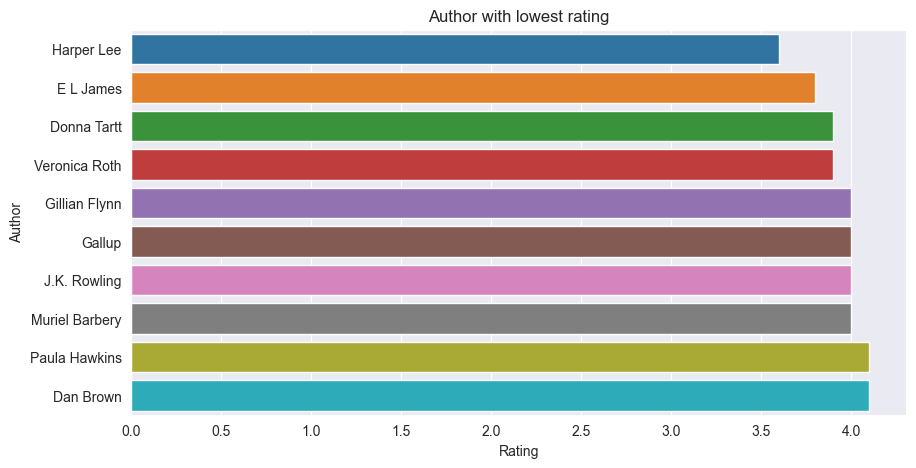

In [12]:
#Least popular author 

sns.set_style(style = "darkgrid")
plt.figure(figsize = (10,5))
authorLeast = books.sort_values("Rating").head(10)
authorLeast.groupby('Author')
sns.barplot(y = "Author", x = "Rating", data = authorLeast).set(title = "Author with lowest rating")

Harper lee got lowest rating for his book in this dataset

# Most popular book's by rating

[Text(0.5, 1.0, 'Top books by popularity')]

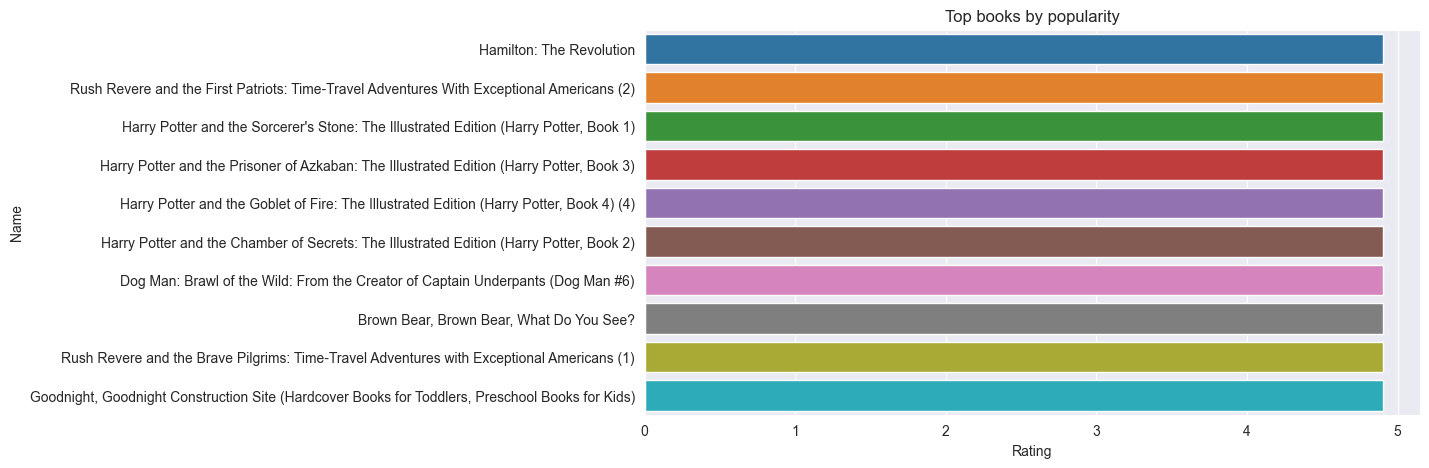

In [13]:
#Most popular BOOK's by rating

sns.set_style(style = "darkgrid")
plt.figure(figsize = (10,5))
book_df = books.sort_values("Rating", ascending = False).head(10)
sns.barplot(y ="Name", x = "Rating", data = book_df).set(title = "Top books by popularity")

#These are the top books by rating

# Books with lowest rating

[Text(0.5, 1.0, 'Books with lowest rating')]

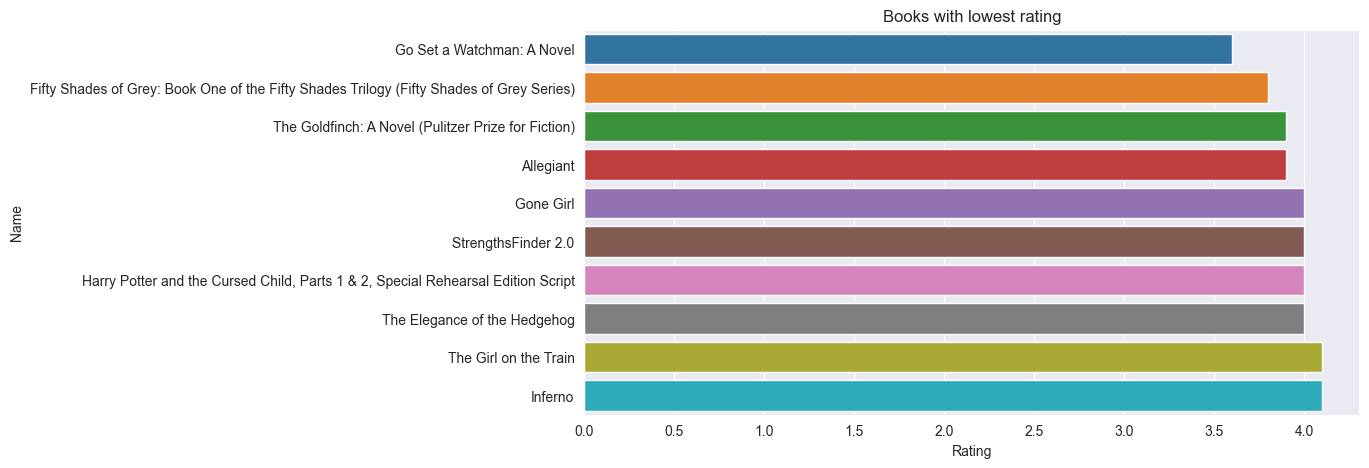

In [14]:
#Books with lowest rating

sns.set_style(style = "darkgrid")
plt.figure(figsize = (10,5))
authorLeast = books.sort_values("Rating").head(10)
sns.barplot(y = "Name", x = "Rating", data = authorLeast).set(title = "Books with lowest rating")

Go Set a Watchman : A novel, is the book with lowest rating, followed by Fifty Shades of Grey.

# # List of 10 most Expensive books

[Text(0.5, 1.0, 'Expensive books')]

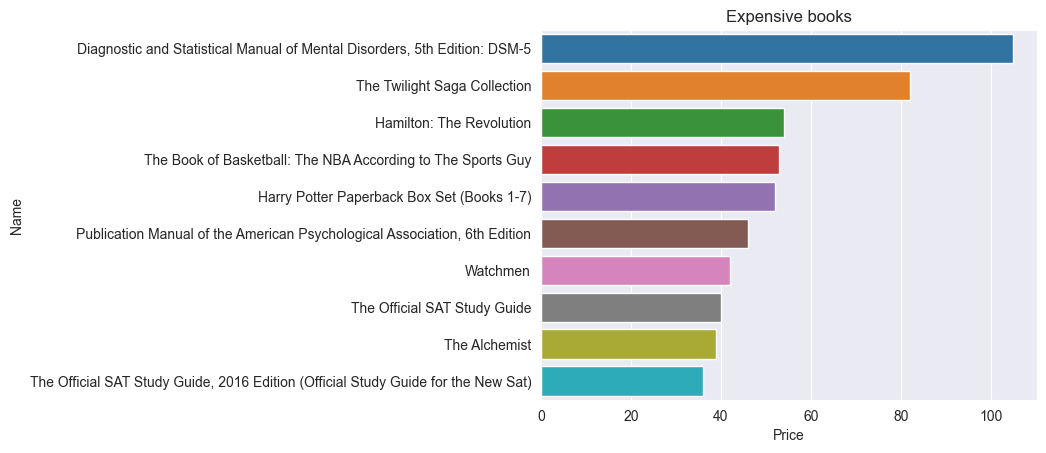

In [27]:
# List of 10 most Expensive books

Most_expensive = books.sort_values("Price", ascending = False).head(10)
sns.barplot(y = "Name", x = "Price", data = Most_expensive).set(title = "Expensive books")

The most expensive book on amazon is :Diagnostic and Statistical Manual of Mental Disorder

# Bestseller book per year

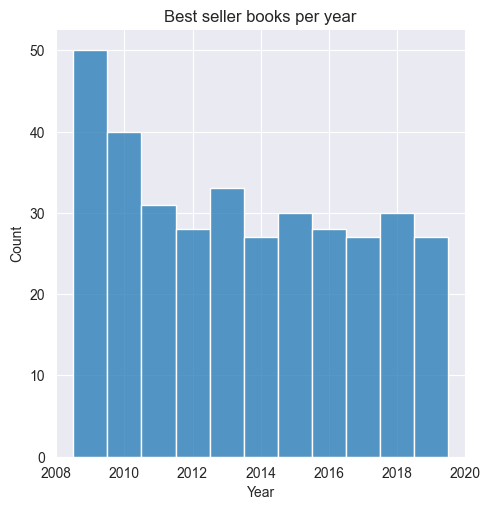

In [48]:
#Creating Distribution plot 

sns.displot(books.Year, discrete = True, aspect = 1, height = 5, kind = "hist").set(title = "Best seller books per year")

# Book with high count of reviews

In [31]:
books_reviews = books.sort_values("Reviews", ascending = False).head(10)
books_reviews

,Name,Author,Rating,Reviews,Price,Year,Genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction
382,The Girl on the Train,Paula Hawkins,4.1,79446,18,2015,Fiction
32,Becoming,Michelle Obama,4.8,61133,11,2018,Non Fiction
135,Gone Girl,Gillian Flynn,4.0,57271,10,2012,Fiction
365,The Fault in Our Stars,John Green,4.7,50482,13,2012,Fiction
437,The Nightingale: A Novel,Kristin Hannah,4.8,49288,11,2015,Fiction
106,Fifty Shades of Grey: Book One of the Fifty Sh...,E L James,3.8,47265,14,2012,Fiction
433,The Martian,Andy Weir,4.7,39459,9,2015,Fiction
20,All the Light We Cannot See,Anthony Doerr,4.6,36348,14,2014,Fiction
338,The Alchemist,Paulo Coelho,4.7,35799,39,2014,Fiction


As we can see,these are the top reviewed books

# Total number of fiction and non-fiction books

In [42]:
fiction = 0
non_fiction = 0
for i in books.Genre:
    if i == "Fiction":
        fiction +=1
    else:
        non_fiction +=1
        
print("Number of fiction books:", fiction)
print("Number of non-fiction books:", non_fiction)

Number of fiction books: 160
Number of non-fiction books: 191


There are 160 fiction and 191 nonFiction books

# Pie-Chart of genre

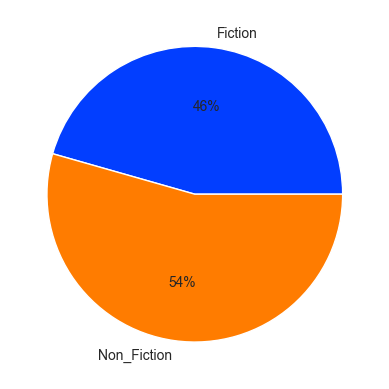

In [47]:
data = [fiction, non_fiction]
keys = ["Fiction", "Non_Fiction"]
palette_color = sns.color_palette('bright')
  
# plotting data on chart
plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')
  
# displaying chart
plt.show()